In [1]:
import os
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 1. combing the data

In [ ]:


# 文件夹路径
folder_path = '/Applications/hello/论文/补充数据'

# 获取文件夹中所有CSV文件
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# 读取并合并所有CSV文件
df_list = [pd.read_csv(file) for file in all_files]
merged_df = pd.concat(df_list, ignore_index=True)

# 输出合并后的数据框
merged_df.to_csv('merged_data_all_suppliment_@.csv', index=False)  # 和后面用不一样，修改过


In [3]:


# 读取合并后的数据
df = pd.read_csv('/Applications/hello/论文/merged_data_all_suppliment_5.csv')

# 定义国家代码映射字典

# 定义国家代码映射字典
country_code_mapping = {
    'LX': 'Luxembourg',
    'US': 'United States',
    'GB': 'United Kingdom',
    'J': 'Japan',
    'S': 'Switzerland',
    'BS':'Switzerland',
    'W': 'Sweden',
    'E': 'Spain',
    'BR': 'Brazil',
    'CN': 'China',
    'IN': 'India',
    'KR': 'South Korea',
    'ZA': 'South Africa',
    'T': 'Singapore',
    'MX': 'Mexico',
    'N': 'Norway',
    'IE': 'Ireland',
    'NZ': 'New Zealand',
    'DK': 'Denmark',
    'Q': 'Thailand',
    'TW': 'Taiwan',
    'AG': 'Argentina',
    'CL': 'Chile',
    'CO': 'Colombia',
    'BL': 'Bolivia',
    'SA': 'Saudi Arabia',
    'A': 'Australia',
    'O': 'Austria',
    'BA': 'Bahrain',
    'B': 'Belgium',
    'C': 'Canada',
    'CP': 'Cyprus',
    'M': 'Finland',
    'F': 'France',
    'D': 'Germany',
    'G': 'Greece',
    'K': 'Hong Kong',
    'HN': 'Hungary',
    'IC': 'Iceland',
    'ID': 'Indonesia',
    'IS': 'Israel',
    'I': 'Italy',
    'JO': 'Jordan',
    'KO': 'Korea',
    'Z': 'New Zealand',
    'PO': 'Poland',
    'P': 'Portugal',
    'RM': 'Romania',
    'RS': 'Russia',
    'VT': 'Vietnam',
    '@': 'United States',
    'L': 'Malaysia',
    'H': 'Netherlands',
    'A': 'Australia',
    'TW': 'Taiwan',
    'TK': 'Turkey'

}
# 定义填充Market列的函数
def fill_market(row):
    if pd.notna(row['Type']):
        # 获取Type中“:”前的部分
        code = row['Type'].split(':')[0]
        # 尝试用分割得到的代码匹配
        if code in country_code_mapping:
            return country_code_mapping[code]
    # 若无法匹配则返回原始值
    return row['Market']

# 仅对Market为空的行进行填充
df['Market'] = df.apply(lambda row: fill_market(row) if pd.isna(row['Market']) else row['Market'], axis=1)

# 补充特定条件的Market值
df.loc[df['Type'] == '2723VD', 'Market'] = 'Thailand'
df.loc[df['Type'].str.startswith('@', na=False), 'Market'] = 'United States'

# 将仍然缺失的Market值填充为United Kingdom
df['Market'] = df['Market'].fillna('United Kingdom')

# 保存结果
df.to_csv('suppliment_merged_data_withMarket_v5.csv', index=False)


# 2. Dealing with missingvalue

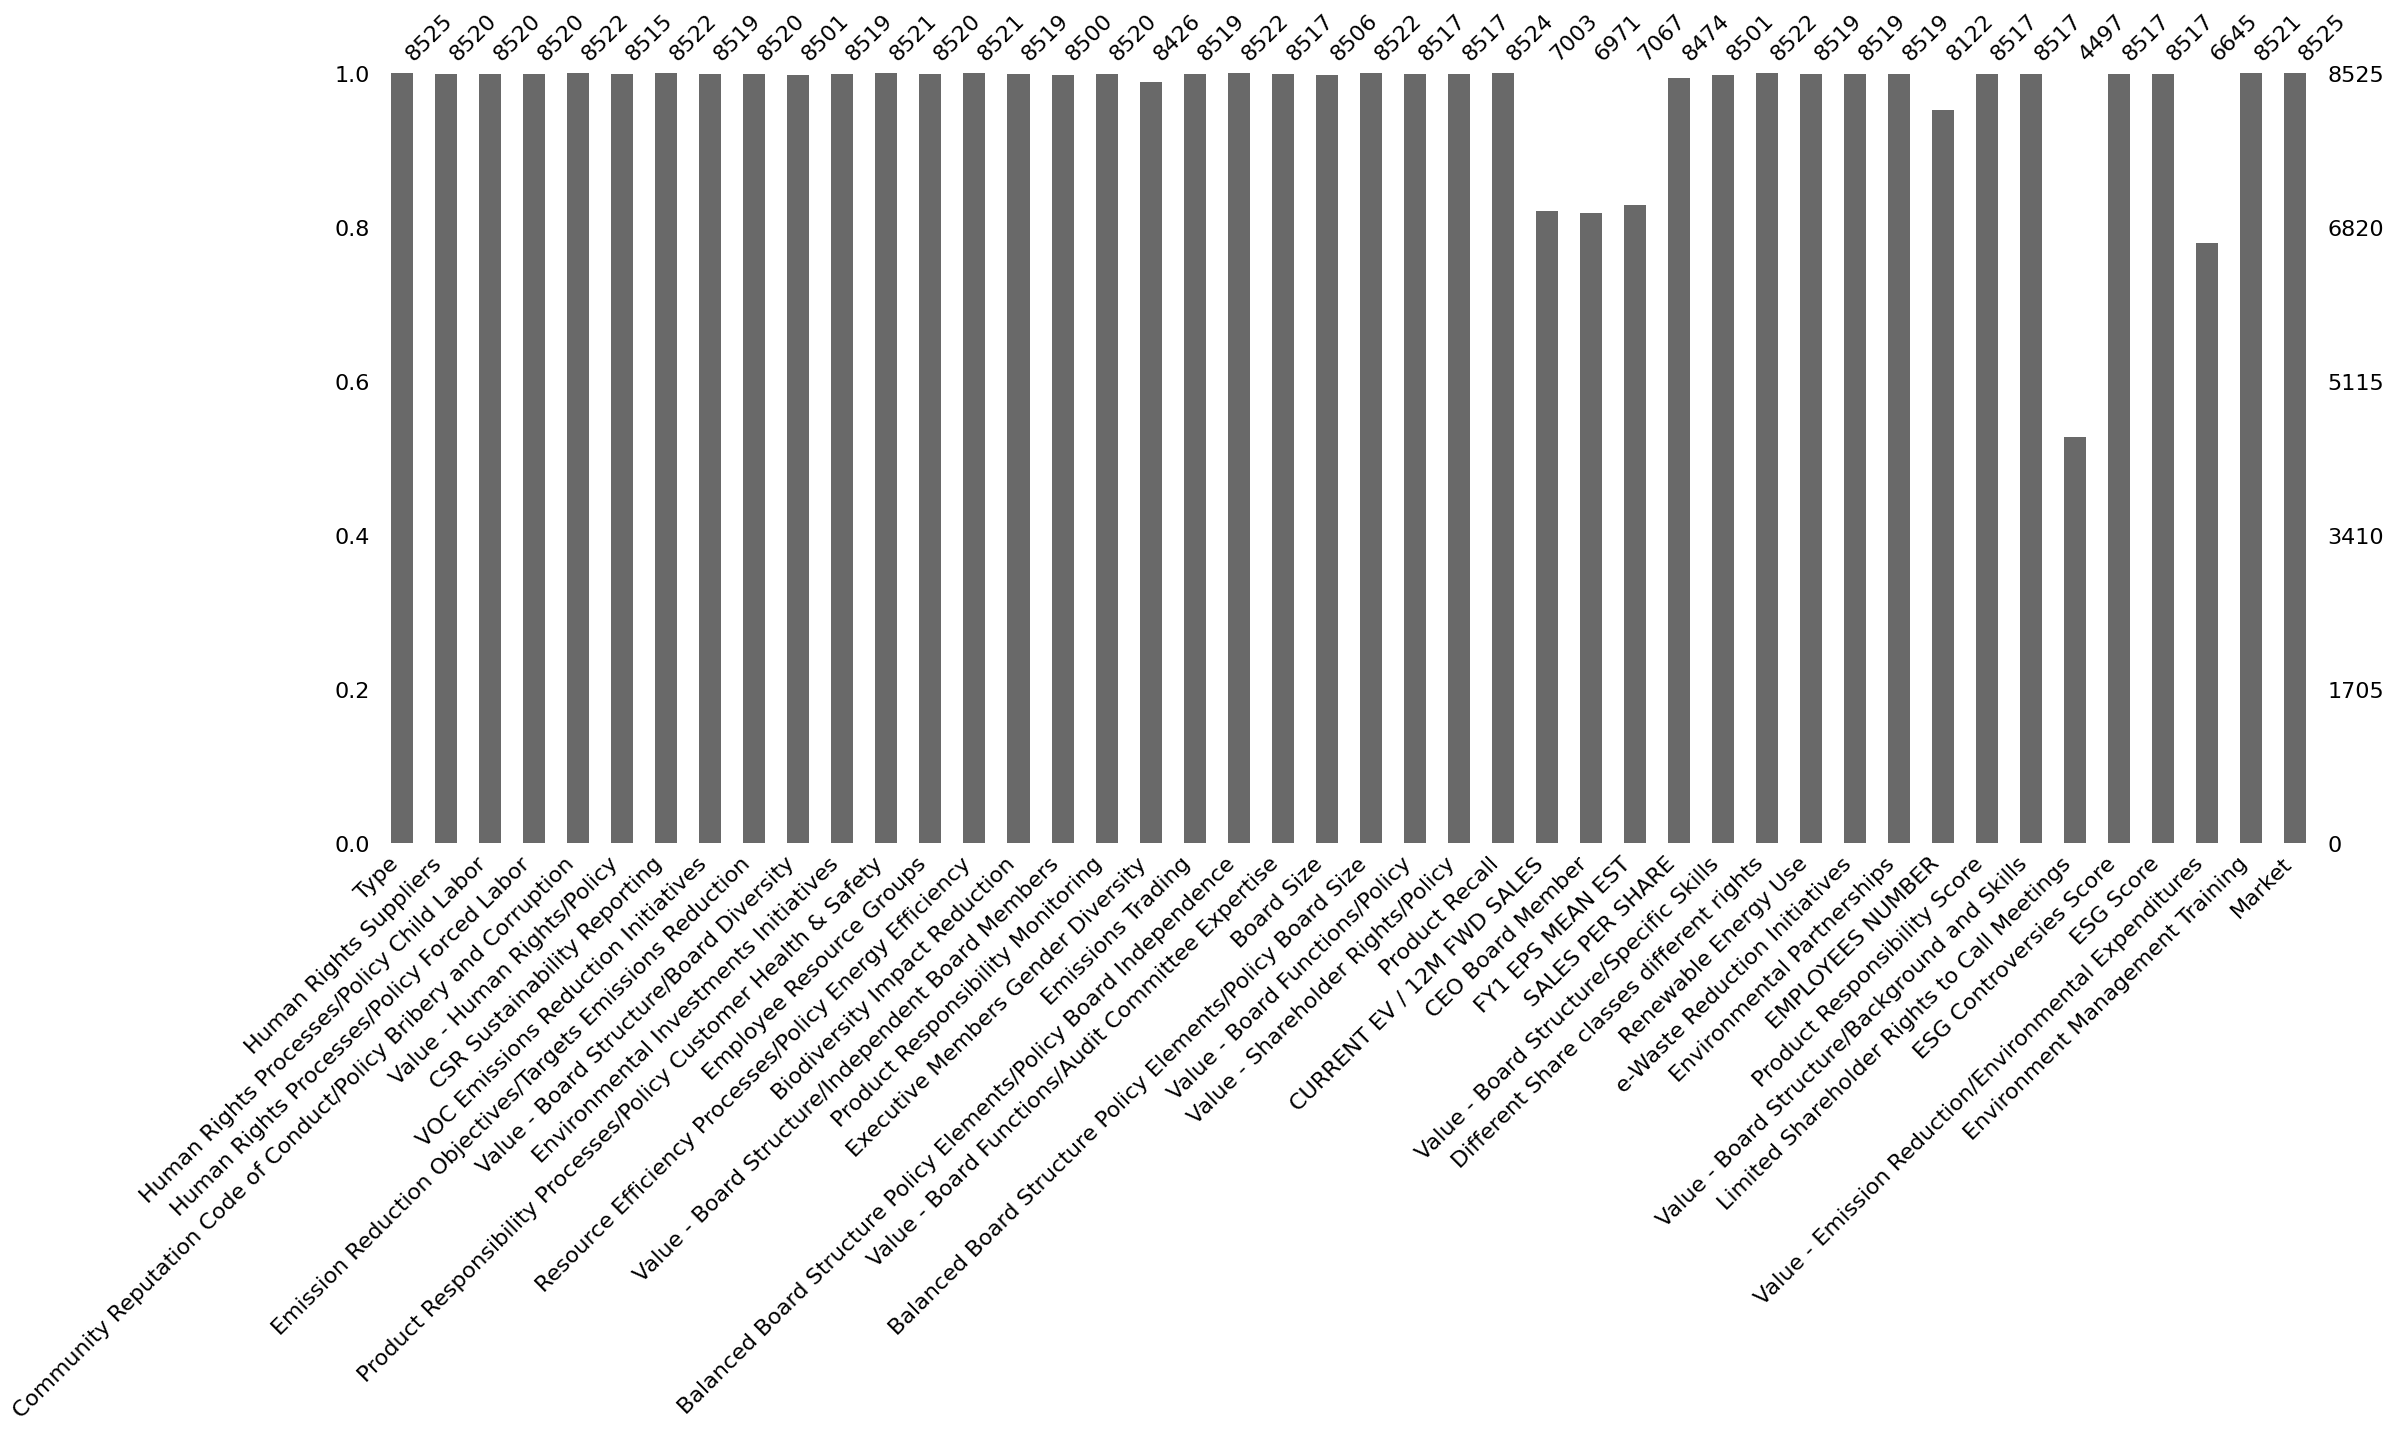

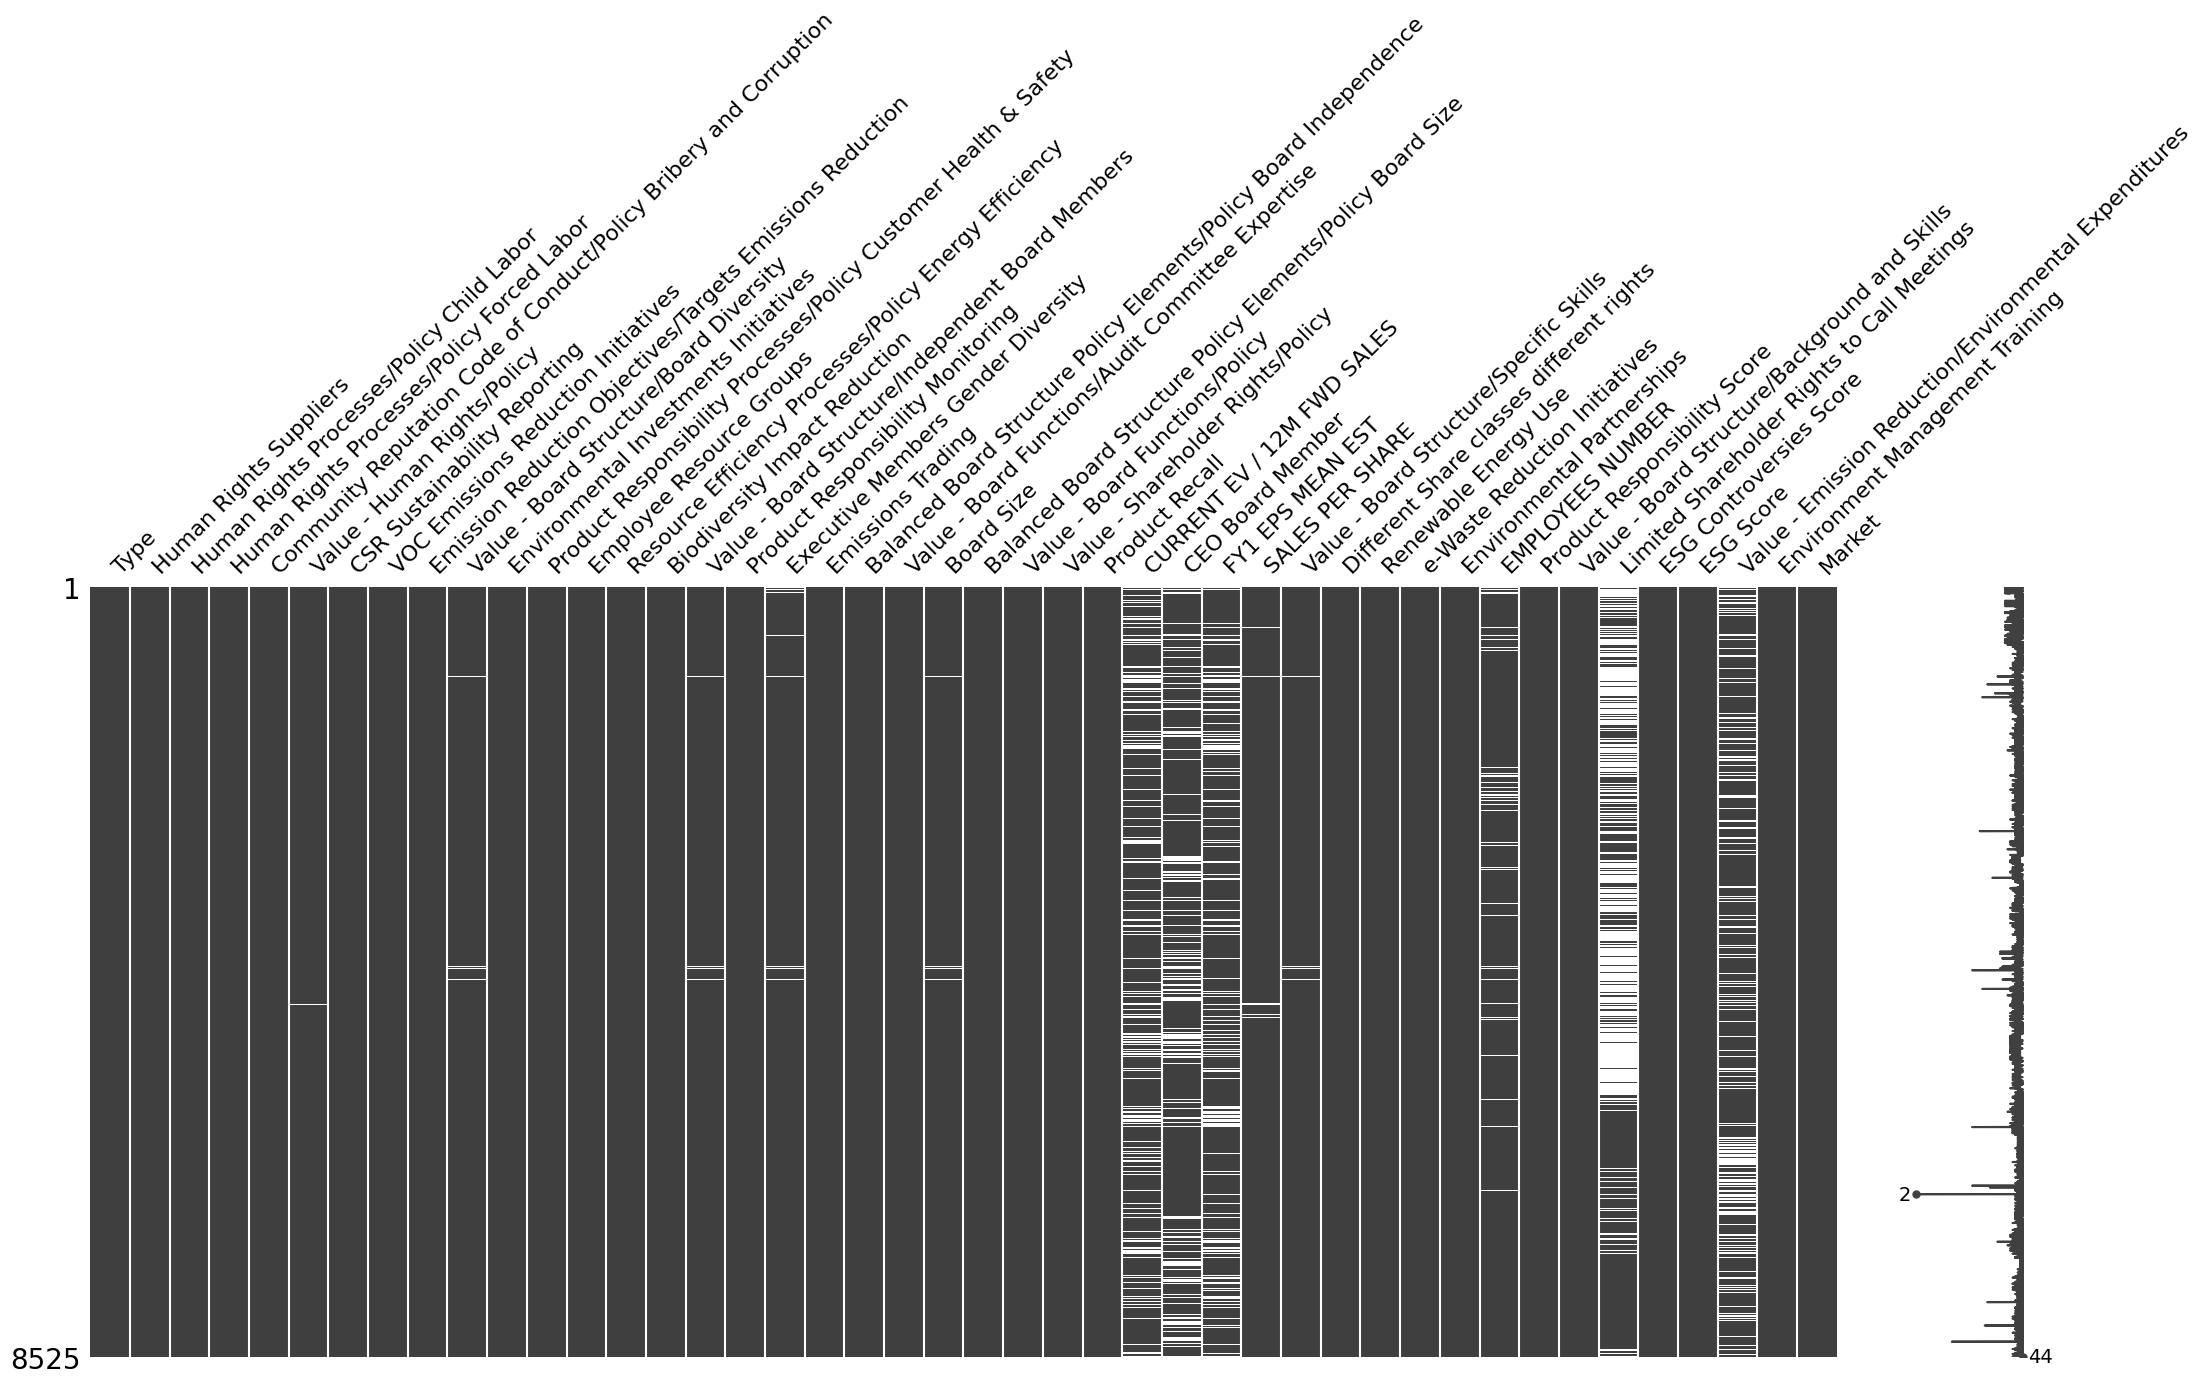

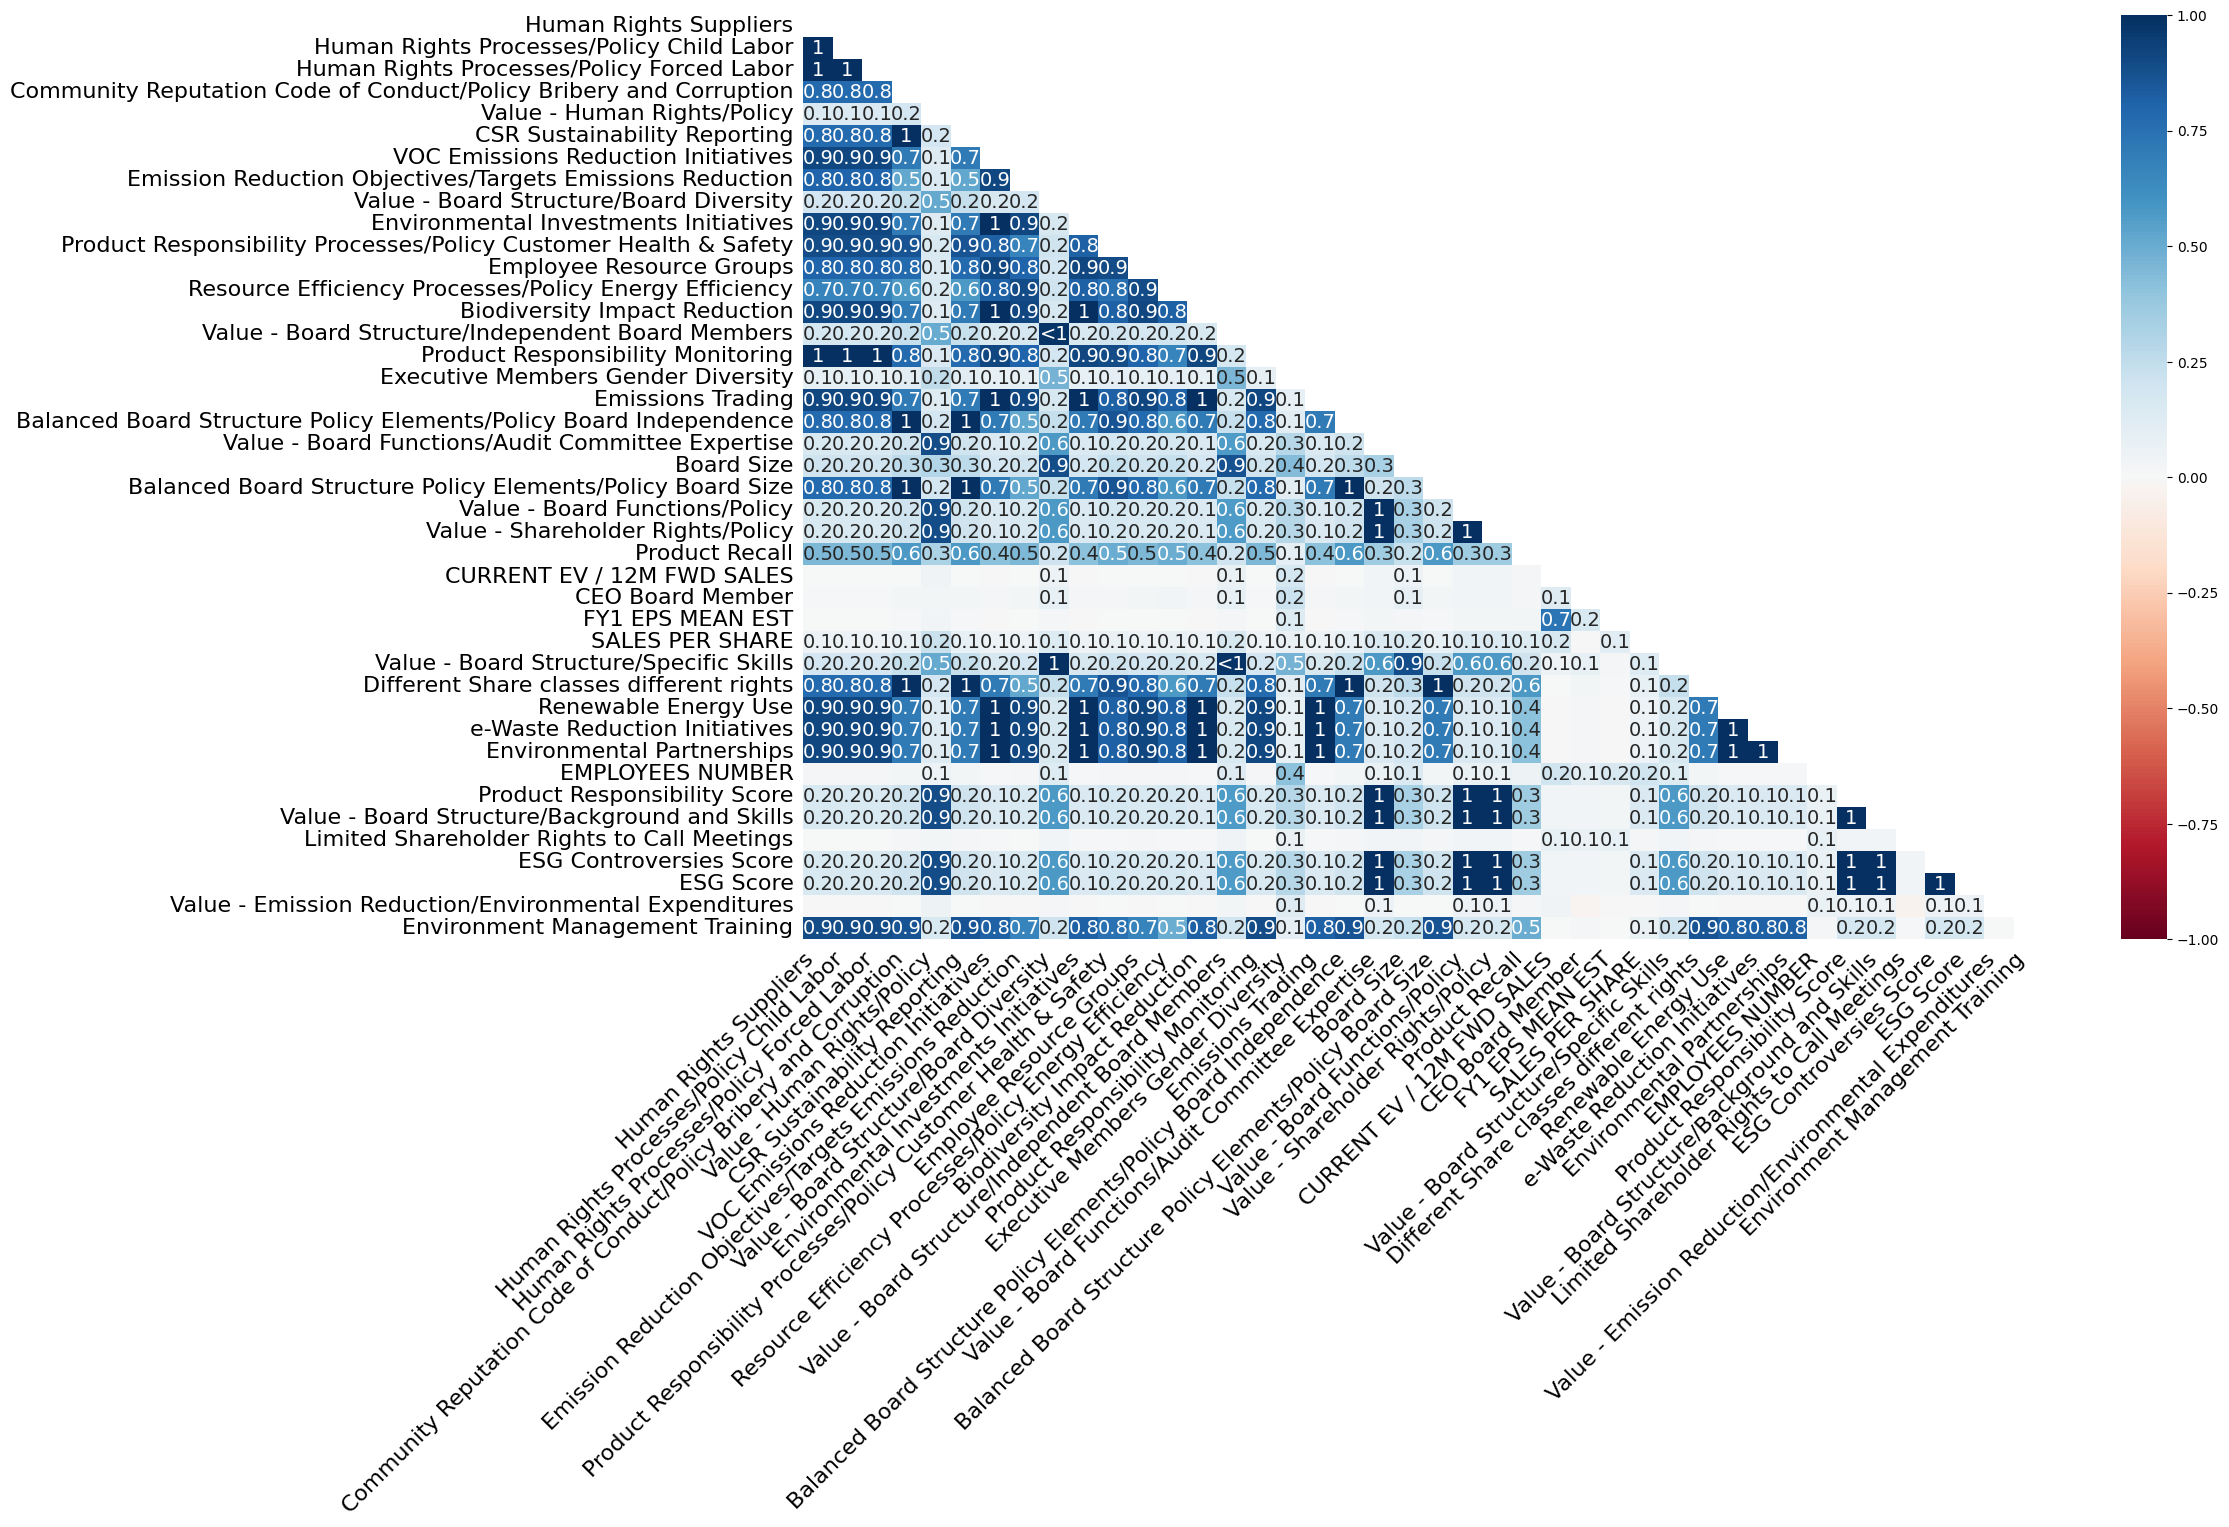

In [4]:
# 读取数据
df = pd.read_csv('suppliment_merged_data_withMarket_v5.csv')

# 显示缺失值的柱状图
msno.bar(df)
plt.show()

# 显示缺失值的矩阵图
msno.matrix(df)
plt.show()

# 显示缺失值的热力图
msno.heatmap(df)
plt.show()

In [5]:
# 找出DataFrame中的分类特征
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# 用众数填补分类特征的缺失值
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # 获取列的众数
    df[col] = df[col].fillna(mode_value)  # 直接赋值回原列

# 保存结果
df.to_csv('suppliment_merged_data_filled1_v5.csv', index=False)


In [6]:
df = pd.read_csv('suppliment_merged_data_filled1_v5.csv')
df = df.dropna(subset=['ESG Score'])
# 查找剩余含有缺失值的列
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# 打印含有缺失值的列及其缺失值数量
print("含有缺失值的列及其缺失数量：")
print(missing_columns)

含有缺失值的列及其缺失数量：
Value - Board Structure/Board Diversity                16
Value - Board Structure/Independent Board Members      17
Executive Members Gender Diversity                     91
Board Size                                             15
CURRENT EV / 12M FWD SALES                           1517
FY1 EPS MEAN EST                                     1454
SALES PER SHARE                                        48
Value - Board Structure/Specific Skills                16
EMPLOYEES NUMBER                                      399
dtype: int64


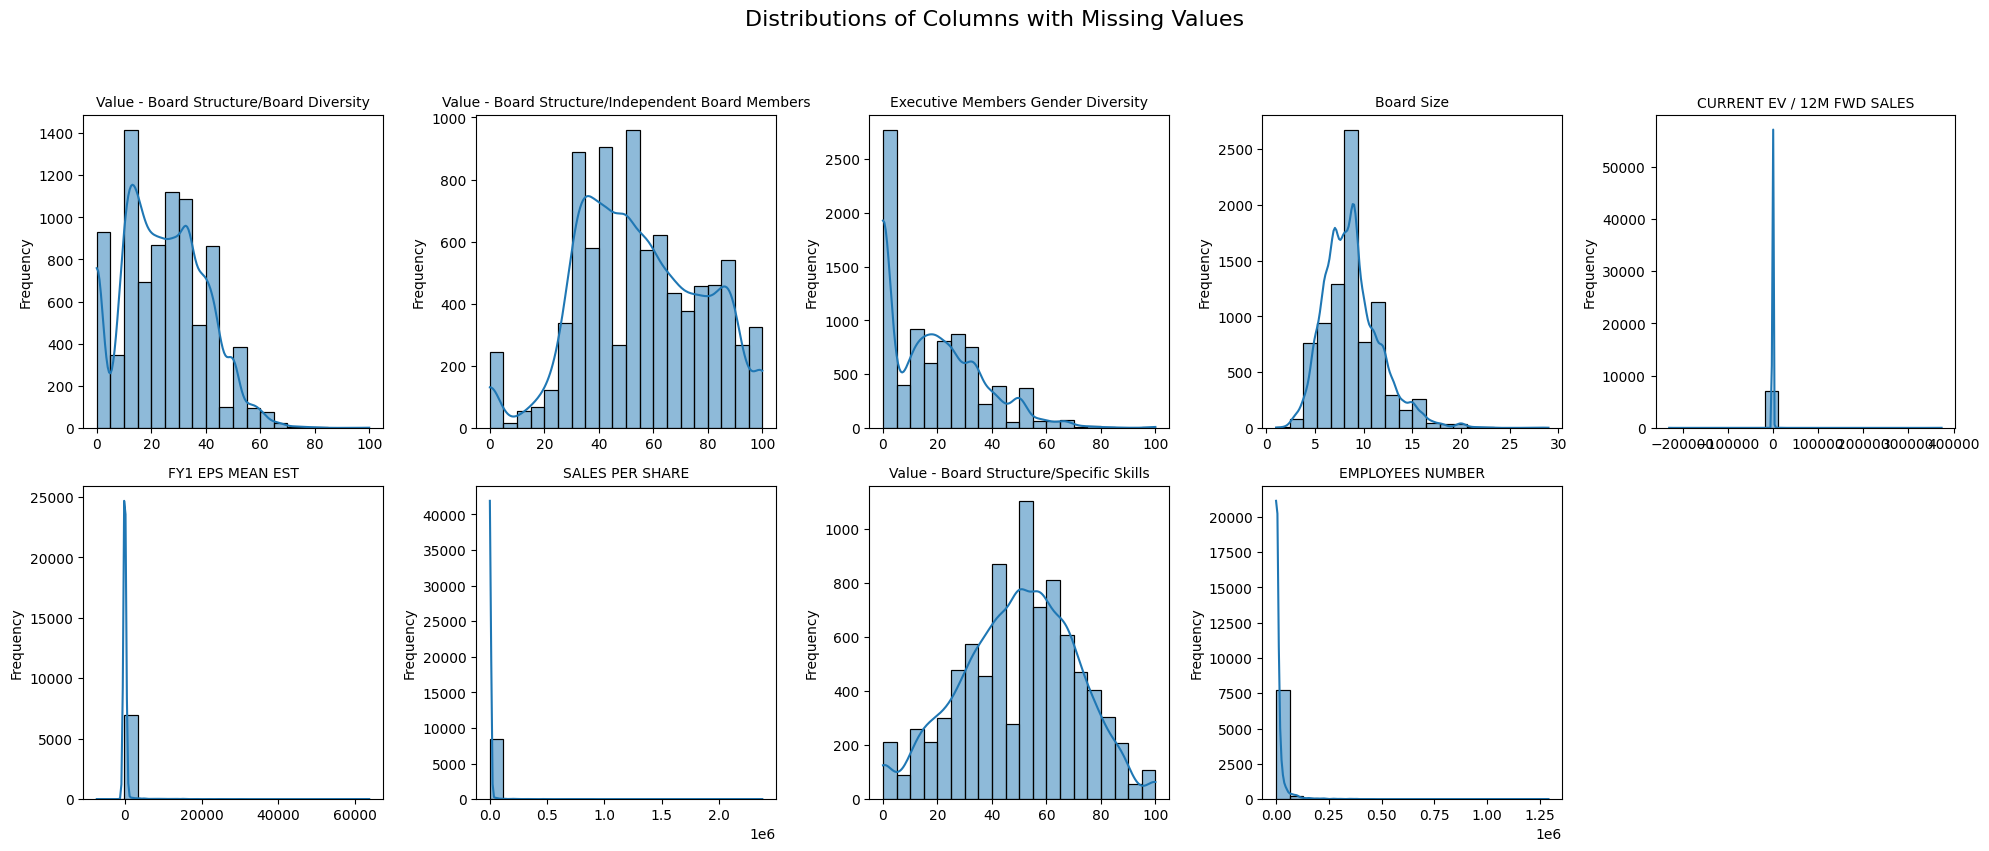

In [7]:
# 定义含有缺失值的列
missing_columns = [
    'Value - Board Structure/Board Diversity',
    'Value - Board Structure/Independent Board Members',
    'Executive Members Gender Diversity',
    'Board Size',
    'CURRENT EV / 12M FWD SALES',
    'FY1 EPS MEAN EST',
    'SALES PER SHARE',
    'Value - Board Structure/Specific Skills',
    'EMPLOYEES NUMBER'
]
# 设置3行5列的网格布局
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
fig.suptitle("Distributions of Columns with Missing Values", fontsize=16)

# 逐列绘制分布图
for i, col in enumerate(missing_columns):
    row, col_pos = divmod(i, 5)  # 计算行和列位置
    sns.histplot(df[col], kde=True, bins=20, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f"{col}", fontsize=10)
    axes[row, col_pos].set_xlabel("")
    axes[row, col_pos].set_ylabel("Frequency")

# 去除多余的子图格
for j in range(len(missing_columns), 15):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局以适应标题
plt.show()


In [8]:
# 读取数据


# 定义需要使用中位数填充的列
median_fill_columns = [
    'Value - Board Structure/Board Diversity',
    'Value - Board Structure/Independent Board Members',
    'Executive Members Gender Diversity',
    'Board Size',
    'CURRENT EV / 12M FWD SALES',
    'FY1 EPS MEAN EST',
    'SALES PER SHARE',
    'Value - Board Structure/Specific Skills',
    'EMPLOYEES NUMBER'
]

# 用中位数填充指定的列
for col in median_fill_columns:
    df[col] = df[col].fillna(df[col].median())

# 用众数填充 'ESG Controversies Score' 列
df['ESG Controversies Score'] = df['ESG Controversies Score'].fillna(df['ESG Controversies Score'].mode()[0])

# 删除 'ESG Score' 缺失的行
df = df.dropna(subset=['ESG Score'])

# 保存处理后的数据
df.to_csv('suppliment_merged_data_filled2_v5.csv', index=False)

In [9]:
# 检查每列中的缺失值数量
missing_values = df.isnull().sum()

# 筛选出含有缺失值的列
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("数据中没有缺失值。")
else:
    print("含有缺失值的列及其缺失数量：")
    print(missing_columns)

数据中没有缺失值。


# 3. data encode

In [10]:
data_encoded = pd.read_csv('suppliment_merged_data_filled2_v5.csv')

# 对数据中的每个列进行检测，如果是object类型且不是 'Type' 或 'Market'，则进行编码
for column in data_encoded.select_dtypes(include=['object']).columns:
    if column not in ['Type', 'Market']:
        # 创建LabelEncoder
        le = LabelEncoder()
        # 对列进行编码
        data_encoded[column] = le.fit_transform(data_encoded[column])

# 检查编码后的数据
print(data_encoded.head())
data_encoded.to_csv('suppliment_encoded_v5.csv', index=False)

   Type  Human Rights Suppliers  Human Rights Processes/Policy Child Labor  \
0   III                       1                                          1   
1   AZN                       1                                          1   
2  HSBA                       1                                          1   
3   PIN                       1                                          0   
4  ULVR                       1                                          1   

   Human Rights Processes/Policy Forced Labor  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   Community Reputation Code of Conduct/Policy Bribery and Corruption  \
0                                                  1                    
1                                                  1                    
2                

# Rating

In [11]:
data = pd.read_csv('suppliment_encoded_v5.csv')
def categorize_esg(score):
    if score <= 25:
        return 'D'  # First Quartile
    elif 25 < score <= 50:
        return 'C'  # Second Quartile
    elif 50 < score <= 75:
        return 'B'  # Third Quartile
    elif score > 75:
        return 'A'  # Fourth Quartile

# 创建一个新的列来存储分类结果
data['ESG_Rating'] = data['ESG Score'].apply(categorize_esg)

# 统计每个类别的数量
category_counts = data['ESG_Rating'].value_counts()

# 打印每个类别的记录数量
print(category_counts)

ESG_Rating
B    3228
C    3222
D    1282
A     785
Name: count, dtype: int64


In [12]:
# 删除 'ESG Score' 列
data.drop(columns=['ESG Score'], inplace=True)

data.to_csv('data_to_fit_suppliment_v5.csv', index=False)

# 5. world bank data

In [103]:
# 读取数据
world_bank_data = pd.read_csv('/Applications/hello/论文/补充数据/1/workd_bank_data.csv')

# 删除第一列（假设为索引列）
world_bank_data = world_bank_data.iloc[:, 1:]

# 删除缺失比例大于 70% 的列
threshold_missing = 0.5
missing_ratios = world_bank_data.isnull().mean()
columns_to_drop_missing = missing_ratios[missing_ratios > threshold_missing].index
world_bank_data = world_bank_data.drop(columns=columns_to_drop_missing)

# 删除所有唯一值的列（只有一个唯一值的列）
columns_to_drop_unique = [col for col in world_bank_data.columns if world_bank_data[col].nunique() == 1]
world_bank_data = world_bank_data.drop(columns=columns_to_drop_unique)

# 删除方差小于阈值的列 (0.01)
threshold_variance = 0.01
numeric_data = world_bank_data.select_dtypes(include=[np.number])
variances = numeric_data.var()
columns_to_drop_variance = variances[variances < threshold_variance].index
world_bank_data = world_bank_data.drop(columns=columns_to_drop_variance)

# 打印删除的列
deleted_columns = columns_to_drop_missing.union(columns_to_drop_unique).union(columns_to_drop_variance)
print("Deleted columns:", deleted_columns)

Deleted columns: Index(['Annualized average growth rate in per capita real survey mean consumption or income, total population (%) [SI.SPR.PCAP.ZG]',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]',
       'Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]',
       'Economic and Social Rights Performance Score [SD.ESR.PERF.XQ]',
       'Electricity production from coal sources (% of total) [EG.ELC.COAL.ZS]',
       'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
       'Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE]',
       'Fossil fuel energy consumption (% of total) [EG.USE.COMM.FO.ZS]',
       'GHG net emissions/removals by LUCF (Mt of CO2 equivalent) [EN.CLC.GHGR.MT.CE]',
       'Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]',
       'Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       'Mammal species, threatened [E

In [104]:
# 删除 'Country Name' 中缺失的行
world_bank_data = world_bank_data.dropna(subset=['Country Name'])

# 处理分类列：使用众数填补
categorical_cols = world_bank_data.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
world_bank_data[categorical_cols] = imputer_mode.fit_transform(world_bank_data[categorical_cols])

# 检查缺失值情况
missing_values_count = world_bank_data.isnull().sum()
print("Missing values after mode imputation:")
print(missing_values_count[missing_values_count > 0])

Missing values after mode imputation:
Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]                               2
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                            2
Adjusted savings: natural resources depletion (% of GNI) [NY.ADJ.DRES.GN.ZS]                                        3
Adjusted savings: net forest depletion (% of GNI) [NY.ADJ.DFOR.GN.ZS]                                               3
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                                 1
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]                                         1
Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]                                     2
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                                                             1
Coastal protection

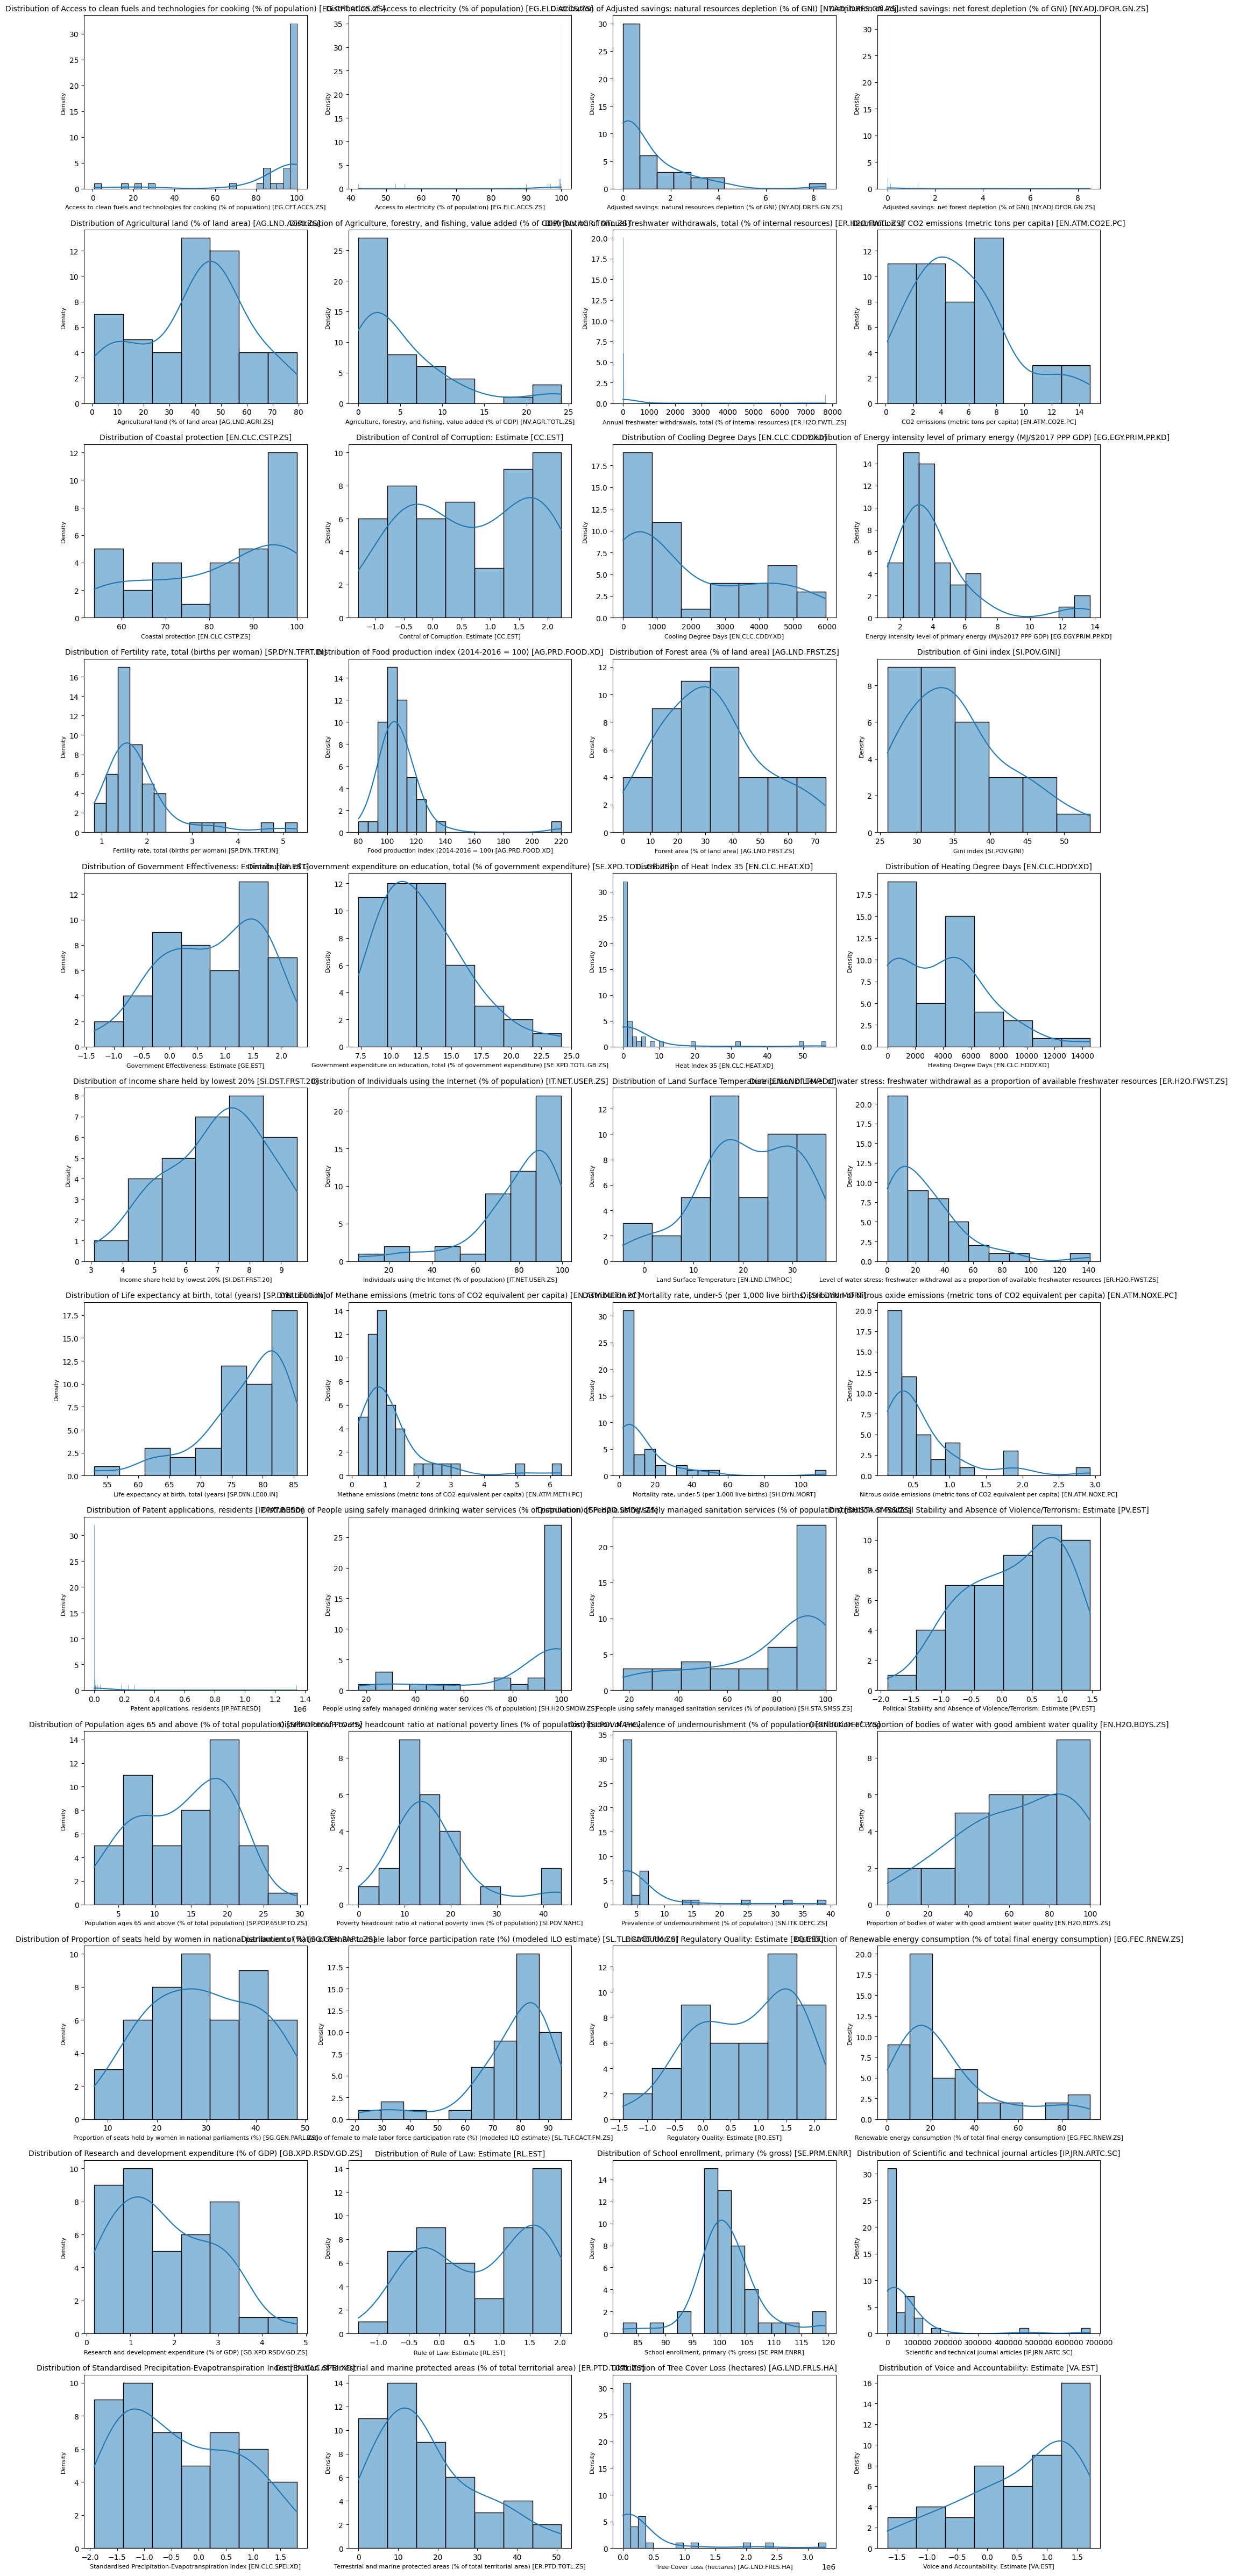

In [105]:
# 筛选出所有有缺失值的列
columns_with_missing = world_bank_data.columns[world_bank_data.isnull().any()]

# 设置每行显示 6 个图表
num_cols = 4
num_rows = (len(columns_with_missing) + num_cols - 1) // num_cols

# 设置绘图参数
plt.figure(figsize=(20, num_rows * 4))

# 绘制每个列的直方图
for i, col in enumerate(columns_with_missing, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(world_bank_data[col], kde=True)
    plt.title(f'Distribution of {col}',fontsize = 10)
    plt.xlabel(col,fontsize = 8)
    plt.ylabel('Density',fontsize = 8)
    plt.grid(False)

plt.tight_layout()
plt.show()

In [106]:
# 定义各类填补方法的列
mean_impute_columns = [
    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
    'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
    'Government Effectiveness: Estimate [GE.EST]',
    'Control of Corruption: Estimate [CC.EST]',
    'Individuals using the Internet (% of population) [IT.NET.USER.ZS]',
    'Rule of Law: Estimate [RL.EST]',
    'Population ages 65 and above (% of total population) [SP.POP.65UP.TO.ZS]',
    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]'
]

median_impute_columns = [
    'Adjusted savings: natural resources depletion (% of GNI) [NY.ADJ.DRES.GN.ZS]',
    'Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]',
    'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]',
    'Cooling Degree Days [EN.CLC.CDDY.XD]',
    'Nitrous oxide emissions (metric tons of CO2 equivalent per capita) [EN.ATM.NOXE.PC]',
    'Income share held by lowest 20% [SI.DST.FRST.20]',
    'Forest area (% of land area) [AG.LND.FRST.ZS]',
    'Food production index (2014-2016 = 100) [AG.PRD.FOOD.XD]',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]',
    'Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]',
    'Gini index [SI.POV.GINI]',
    'Land Surface Temperature [EN.LND.LTMP.DC]',
    'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources [ER.H2O.FWST.ZS]',
    'Heating Degree Days [EN.CLC.HDDY.XD]'
]

mode_impute_columns = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'People using safely managed drinking water services (% of population) [SH.H2O.SMDW.ZS]',
    'Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS]',
    'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]',
    'Proportion of bodies of water with good ambient water quality [EN.H2O.BDYS.ZS]',
    'School enrollment, primary (% gross) [SE.PRM.ENRR]',
    'Adjusted savings: net forest depletion (% of GNI) [NY.ADJ.DFOR.GN.ZS]',
    'Agricultural land (% of land area) [AG.LND.AGRI.ZS]',
    'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]',
    'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]',
    'Methane emissions (metric tons of CO2 equivalent per capita) [EN.ATM.METH.PC]',
    'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]',
    'Patent applications, residents [IP.PAT.RESD]',
    'People using safely managed sanitation services (% of population) [SH.STA.SMSS.ZS]',
    'Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]',
    'Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS]',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS]',
    'Regulatory Quality: Estimate [RQ.EST]',
    'Standardised Precipitation-Evapotranspiration Index [EN.CLC.SPEI.XD]',
    'Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS]',
    'Tree Cover Loss (hectares) [AG.LND.FRLS.HA]',
    'Heat Index 35 [EN.CLC.HEAT.XD]',
    'Scientific and technical journal articles [IP.JRN.ARTC.SC]',
    'Voice and Accountability: Estimate [VA.EST]'

]

# 填补缺失值
world_bank_data[mean_impute_columns] = world_bank_data[mean_impute_columns].apply(lambda x: x.fillna(x.mean()))
world_bank_data[median_impute_columns] = world_bank_data[median_impute_columns].apply(lambda x: x.fillna(x.median()))
world_bank_data[mode_impute_columns] = world_bank_data[mode_impute_columns].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

# 检查是否还有缺失值
remaining_missing = world_bank_data.isnull().sum()
print("Remaining missing values after imputation:\n", remaining_missing[remaining_missing > 0])


Remaining missing values after imputation:
 Coastal protection [EN.CLC.CSTP.ZS]                                                  17
Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC]    25
dtype: int64


In [107]:
# 要删除的缺失值过多且分布较稀疏的列
columns_to_drop = [
    'Coastal protection [EN.CLC.CSTP.ZS]',
    'Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC]'
]

# 删除列
world_bank_data = world_bank_data.drop(columns=columns_to_drop)




In [108]:
# 检查 merged_features 中是否有缺失值
has_missing_values = world_bank_data.isnull().values.any()
if has_missing_values:
    print("数据中存在缺失值")
else:
    print("数据中没有缺失值")

数据中没有缺失值


In [ ]:
world_bank_data.to_csv('world_bank_data_cleaned_suppliment@.csv', index=False) # 和后面用不一样，修改过

## 7. combing


In [18]:
world_bank_data = pd.read_csv('world_bank_data_cleaned_suppliment.csv')
esg_data = pd.read_csv('data_to_fit_suppliment_v5.csv')

In [19]:

# 使用 'Market' 列（公司信息）和 'Country Name' 列（World Bank 数据）进行合并
merged_all = pd.merge(esg_data, world_bank_data, left_on='Market', right_on='Country Name', how='outer')


# 查看合并后的数据形状和部分数据
print("合并后的数据形状：", merged_all.shape)
print(merged_all.head())

# 保存合并后的数据到新文件
merged_all.to_csv('merged_all_features_with_worldbank_suppliment_v1.csv', index=False)

合并后的数据形状： (8517, 97)
     Type  Human Rights Suppliers  Human Rights Processes/Policy Child Labor  \
0  AG:YPF                       0                                          1   
1  AG:FRA                       1                                          1   
2  AG:TGS                       1                                          1   
3  AG:AGR                       0                                          0   
4  AG:ALU                       0                                          0   

   Human Rights Processes/Policy Forced Labor  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   Community Reputation Code of Conduct/Policy Bribery and Corruption  \
0                                                  1                    
1                                                  1     

In [16]:
# 检查 merged_features 中是否有缺失值
has_missing_values = merged_all.isnull().values.any()
if has_missing_values:
    print("数据中存在缺失值")
else:
    print("数据中没有缺失值")

数据中没有缺失值


In [20]:
missing_rows = merged_all[merged_all.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [Type, Human Rights Suppliers, Human Rights Processes/Policy Child Labor, Human Rights Processes/Policy Forced Labor, Community Reputation Code of Conduct/Policy Bribery and Corruption, Value - Human Rights/Policy, CSR Sustainability Reporting, VOC Emissions Reduction Initiatives, Emission Reduction Objectives/Targets Emissions Reduction, Value - Board Structure/Board Diversity, Environmental Investments Initiatives, Product Responsibility Processes/Policy Customer Health & Safety, Employee Resource Groups, Resource Efficiency Processes/Policy Energy Efficiency, Biodiversity Impact Reduction, Value - Board Structure/Independent Board Members, Product Responsibility Monitoring, Executive Members Gender Diversity, Emissions Trading, Balanced Board Structure Policy Elements/Policy Board Independence, Value - Board Functions/Audit Committee Expertise, Board Size, Balanced Board Structure Policy Elements/Policy Board Size, Value - Board Functions/Policy, Value - Sha

## 5.2 correlation

In [10]:
# 读取文件
#world_bank_data = pd.read_csv('world_bank_data_cleaned_suppliment.csv')
#merged_all_data = pd.read_csv('merged_all_features_with_worldbank_suppliment@.csv')

# 确定哪些列在 merged_all_data 中出现并属于 world_bank_data
#world_bank_columns = world_bank_data.columns
#common_columns = [col for col in world_bank_columns if col in merged_all_data.columns and col != 'ESG Score']

# 计算相关性并按降序排列
#correlations = merged_all_data[common_columns + ['ESG Score']].select_dtypes(include='number').corr()['ESG Score'].drop('ESG Score')
#sorted_correlations = correlations.sort_values(ascending=False)

# 显示结果
#print(sorted_correlations)

Proportion of bodies of water with good ambient water quality [EN.H2O.BDYS.ZS]                                      0.099582
Population density (people per sq. km of land area) [EN.POP.DNST]                                                   0.098958
Population ages 65 and above (% of total population) [SP.POP.65UP.TO.ZS]                                            0.090084
Income share held by lowest 20% [SI.DST.FRST.20]                                                                    0.086047
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                            0.085511
Food production index (2014-2016 = 100) [AG.PRD.FOOD.XD]                                                            0.080603
Forest area (% of land area) [AG.LND.FRST.ZS]                                                                       0.058504
Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]                               0.048341


In [11]:
# 找出绝对值小于0.1的列
#low_corr_columns = correlations[correlations.abs() < 0.1].index.tolist()

# 从 merged_all_data 中删除这些列
#merged_all_data_filtered = merged_all_data.drop(columns=low_corr_columns)

# 打印出被删除的列
#print("删除的列:", low_corr_columns)

# 显示删除后的数据集的列
#print("删除后的数据集列:\n", merged_all_data_filtered.columns)

#merged_all_data_filtered.to_csv('merged_all_data_filtered_suppliment.csv', index=False)

删除的列: ['Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]', 'Access to electricity (% of population) [EG.ELC.ACCS.ZS]', 'Adjusted savings: natural resources depletion (% of GNI) [NY.ADJ.DRES.GN.ZS]', 'Adjusted savings: net forest depletion (% of GNI) [NY.ADJ.DFOR.GN.ZS]', 'Agricultural land (% of land area) [AG.LND.AGRI.ZS]', 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]', 'Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]', 'Control of Corruption: Estimate [CC.EST]', 'Cooling Degree Days [EN.CLC.CDDY.XD]', 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]', 'Food production index (2014-2016 = 100) [AG.PRD.FOOD.XD]', 'Forest area (% of land area) [AG.LND.FRST.ZS]', 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]', 'Gini index [SI.POV.GINI]', 'Government Effectiveness: Estimate [GE.EST]', 'Heat Index 35 [EN.CLC.HEAT.XD]', 'Heating Degree Days [EN.CLC.HDDY.XD]', 'Income share held by lowe